/tmp/ipykernel_1772050/3361786181.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_44005= pd.read_csv(pp_root_wave+'44005.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


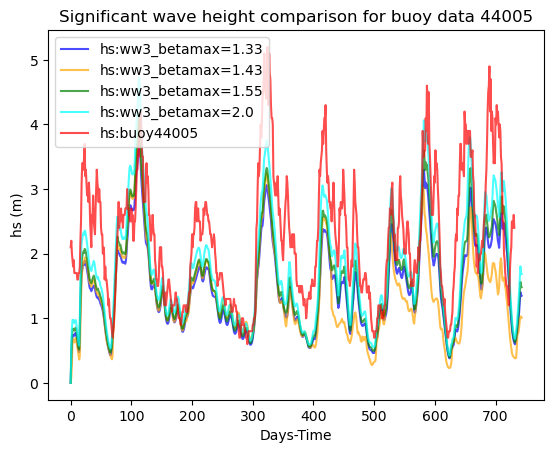

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging
from netCDF4 import Dataset
import netCDF4
import pandas as pd
# import statsmodels.api as sm

    # Ideally would use SSH, but some diag_tables only saved zos----for coupled waves
pp_root_wave="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wave/WW3/PostProc/"
pp_root_wave_beta143="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wave/WW3/PostProc/"
pp_root_wave_beta133="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wavebeta133/WW3/PostProc/"
pp_root_wave_beta155="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wavebeta155/WW3/PostProc/"
pp_root_wave_beta20="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wavebeta20/WW3/PostProc/"

ww3_beta143= Dataset(pp_root_wave_beta143+"ww3.199301.nc")
ww3_beta133= Dataset(pp_root_wave_beta133+"ww3.199301.nc")
ww3_beta155= Dataset(pp_root_wave_beta155+"ww3.199301.nc")
ww3_beta20= Dataset(pp_root_wave_beta20+"ww3.199301.nc")
ww3=ww3_beta143

data_44005= pd.read_csv(pp_root_wave+'44005.txt', sep=r'[ \s]+')  # Or the appropriate delimiter
data_44005= pd.DataFrame(data_44005)

data_44005 = data_44005[data_44005['WVHT'] != 99.0]
days_44005 = data_44005.DD.astype(str).to_numpy()
hours_44005= data_44005.hh.astype(str).to_numpy()
# days_44005 = ["%.0f" % number for number in days_44005]
# hours_44005 = ["%.0f" % number for number in hours_44005]
t_44005 = [x +'-'+y for x, y in zip(days_44005, hours_44005)]



t = ww3_beta133.variables['time']
lon_x=ww3.variables['longitude'][0,:]
lat_y=ww3.variables['latitude'][:,0]
hs = ww3.variables['hs']

hs_beta143=hs
hs_beta133=ww3_beta133.variables['hs']
hs_beta155=ww3_beta155.variables['hs']
hs_beta20=ww3_beta20.variables['hs']


lon_x=np.array(lon_x)
lat_y=np.array(lat_y)
x_bouy_44005=-69.127
y_bouy_44005=43.201
x_index=np.abs(lon_x-x_bouy_44005).argmin()
y_index=np.abs(lat_y-y_bouy_44005).argmin()


m_44005_beta143=np.array(hs[:,y_index,x_index])
m_44005_beta133=np.array(hs_beta133[:,y_index,x_index])
m_44005_beta155=np.array(hs_beta155[:,y_index,x_index])
m_44005_beta20=np.array(hs_beta20[:,y_index,x_index])
# plt.plot(t,m_44005,'r',alpha=0.3,label='ww3')

dates = netCDF4.num2date(t[:], t.units)
years = [date.year for date in dates]
months = [date.month for date in dates]
days = [date.day for date in dates]
hours= [date.hour for date in dates]
days = ["%.0f" % number for number in days]
hours = ["%.0f" % number for number in hours]
t_mh = [x + '-'+y for x, y in zip(days, hours)]


plt.plot(m_44005_beta133,'b', alpha=0.7, label='hs:ww3_betamax=1.33')
plt.plot(m_44005_beta143,color='orange', alpha=0.7, label='hs:ww3_betamax=1.43')
plt.plot(m_44005_beta155,'g', alpha=0.7, label='hs:ww3_betamax=1.55')
plt.plot(m_44005_beta20,'cyan', alpha=0.7, label='hs:ww3_betamax=2.0')

plt.plot(data_44005.WVHT,'r', alpha=0.7, label='hs:buoy44005')
plt.legend(loc='upper left'); plt.xlabel('Days-Time'); plt.ylabel('hs (m)'); plt.title('Significant wave height comparison for buoy data 44005');
# np.savez('44005.npy', m_44005=m_44005, data_44005=np.array(data_44005.WVHT))
# print(np.shape(m_44005))
# print(np.shape(np.array(data_44005.WVHT)))

# def QQ_plot(test1,test2)
#len(test1)>=test(2)



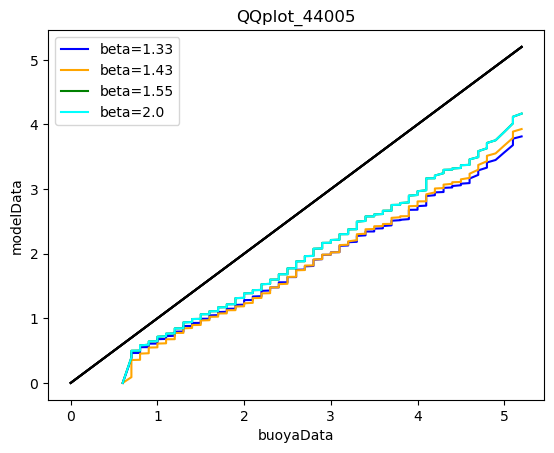

In [4]:
def QQplot(test1,test2,test1label,test2label,title_qq,legend,color):
    import pylab
    import numpy as np
    test1=np.array(test1)
    test2=np.array(test2)
    reverse=False
    if len(test1)<len(test2):
        tem=test2
        test2=test1
        test1=tem
        reverse=True
        
    #Calculate quantiles
    test1.sort()
    quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)
    
    test2.sort()
    quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)
    
    #Use the smaller set of quantile levels to create the plot
    quantile_levels = quantile_levels2
    
    #We already have the set of quantiles for the smaller data set
    quantiles2 = test2
    
    #We find the set of quantiles for the larger data set using linear interpolation
    quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)
    
    #Plot the quantiles to create the qq plot
    if reverse==False:
        pylab.plot(quantiles1,quantiles2,color=color,label=legend)
        pylab.xlabel(test1label)
        pylab.ylabel(test2label)
    else:
        pylab.plot(quantiles2,quantiles1,color=color,label=legend)
        pylab.xlabel(test1label)
        pylab.ylabel(test2label)
  
    
    #Add a reference line
    maxval = max(test1[-1],test2[-1])
    minval = min(test1[0],test2[0])
    pylab.plot([minval,maxval],[minval,maxval],'k-')
    pylab.title(title_qq)
    pylab.legend()

    
    # pylab.show()
QQplot(data_44005.WVHT,m_44005_beta133,'buoyaData','modelData','QQplot_44005','beta=1.33','b')
QQplot(data_44005.WVHT,m_44005_beta143,'buoyaData','modelData','QQplot_44005','beta=1.43','orange')
QQplot(data_44005.WVHT,m_44005_beta155,'buoyaData','modelData','QQplot_44005','beta=1.55','g')
QQplot(data_44005.WVHT,m_44005_beta20,'buoyaData','modelData','QQplot_44005','beta=2.0','cyan')

/tmp/ipykernel_3577508/3948332291.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_41002= pd.read_csv(pp_root_wave+'41002.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


288 -74.95999
353 31.756802


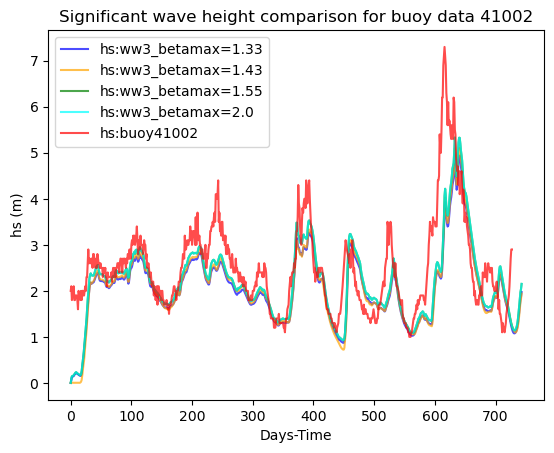

In [5]:
data_41002= pd.read_csv(pp_root_wave+'41002.txt', sep=r'[ \s]+')  # Or the appropriate delimiter
data_41002= pd.DataFrame(data_41002)
data_41002 = data_41002[data_41002['WVHT'] != 99.0]

days_41002 = data_41002.DD.astype(str).to_numpy()
hours_41002= data_41002.hh.astype(str).to_numpy()
t_41002 = [x +'-'+y for x, y in zip(days_41002, hours_41002)]


# Access the data using the header names
x_bouy_41002=-74.936
y_bouy_41002=31.759
x_index=np.abs(lon_x-x_bouy_41002).argmin()
y_index=np.abs(lat_y-y_bouy_41002).argmin()

m_41002_beta143=np.array(hs[:,y_index,x_index])
m_41002_beta133=np.array(hs_beta133[:,y_index,x_index])
m_41002_beta155=np.array(hs_beta155[:,y_index,x_index])
m_41002_beta20=np.array(hs_beta155[:,y_index,x_index])
# plt.plot(t,m_41002,'r',alpha=0.3,label='ww3')
print(x_index,lon_x[x_index])
print(y_index,lat_y[y_index])

plt.plot(m_41002_beta133,'b', alpha=0.7, label='hs:ww3_betamax=1.33')
plt.plot(m_41002_beta143,color='orange', alpha=0.7, label='hs:ww3_betamax=1.43')
plt.plot(m_41002_beta155,'g', alpha=0.7, label='hs:ww3_betamax=1.55')
plt.plot(m_41002_beta20,'cyan', alpha=0.7, label='hs:ww3_betamax=2.0')
# plt.plot(m_41002,'k', alpha=0.3, label='hs:ww3')
plt.plot(data_41002.WVHT,'r', alpha=0.7, label='hs:buoy41002')
plt.legend(loc='best'); plt.xlabel('Days-Time'); plt.ylabel('hs (m)'); plt.title('Significant wave height comparison for buoy data 41002');
plt.show()

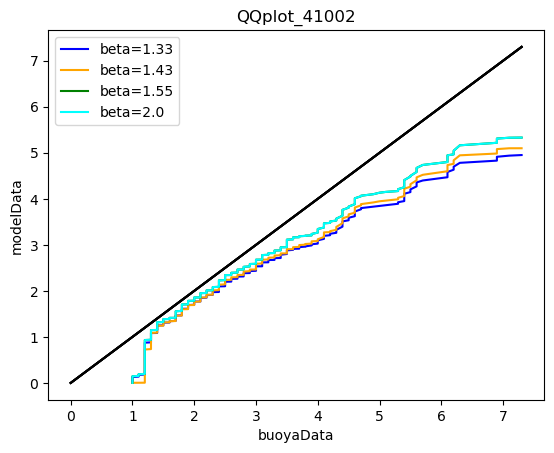

In [7]:
# QQplot(data_41002.WVHT,m_41002,'buoyaData','modelData','QQplot_41002')

QQplot(data_41002.WVHT,m_41002_beta133,'buoyaData','modelData','QQplot_41002','beta=1.33','b')
QQplot(data_41002.WVHT,m_41002_beta143,'buoyaData','modelData','QQplot_41002','beta=1.43','orange')
QQplot(data_41002.WVHT,m_41002_beta155,'buoyaData','modelData','QQplot_41002','beta=1.55','g')
QQplot(data_41002.WVHT,m_41002_beta20,'buoyaData','modelData','QQplot_41002','beta=2.0','cyan')

/tmp/ipykernel_1510541/3562606054.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_buoN= pd.read_csv(pp_root_wave+filenumber+'.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


104 -89.67999
270 25.944979


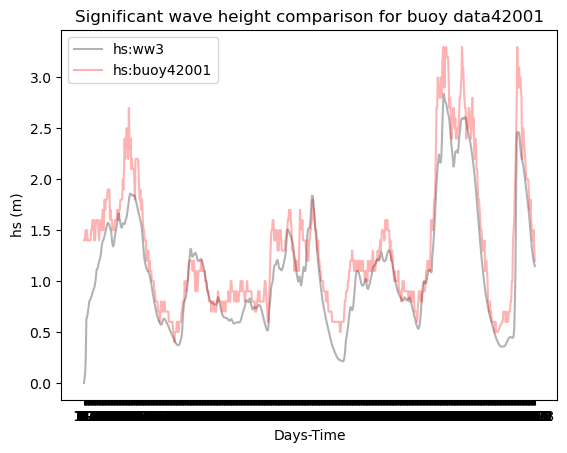

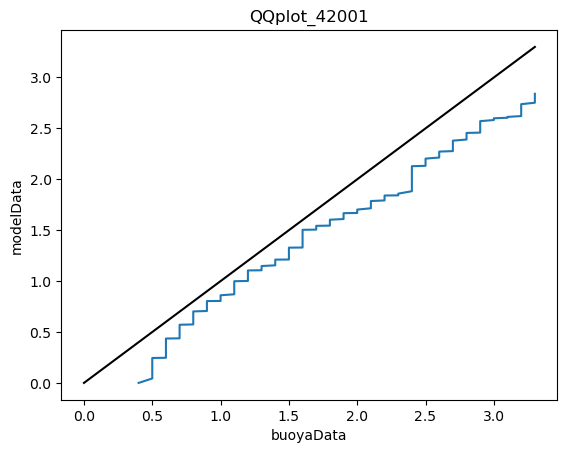

In [26]:
def hscompare_buo(filenumber,x_bouy,y_bouy,lon_x,lat_y,hs,t_mh):
    data_buoN= pd.read_csv(pp_root_wave+filenumber+'.txt', sep=r'[ \s]+')  # Or the appropriate delimiter
    data_buoN= pd.DataFrame(data_buoN)
    data_buoN = data_buoN[data_buoN['WVHT'] != 99.0]
    
    days_buoN = data_buoN.DD.astype(str).to_numpy()
    hours_buoN= data_buoN.hh.astype(str).to_numpy()
    t_buoN = [x +'-'+y for x, y in zip(days_buoN, hours_buoN)]
    
    
    # Access the data using the header names
    
    x_index=np.abs(lon_x-x_bouy).argmin()
    y_index=np.abs(lat_y-y_bouy).argmin()
    m_buoN=np.array(hs[:,y_index,x_index])
    print(x_index,lon_x[x_index])
    print(y_index,lat_y[y_index])
    
    
    plt.plot(t_mh,m_buoN,'k', alpha=0.3, label='hs:ww3')
    plt.plot(t_buoN,data_buoN.WVHT,'r', alpha=0.3, label='hs:buoy'+filenumber)
    plt.legend(loc='best'); plt.xlabel('Days-Time'); plt.ylabel('hs (m)'); plt.title('Significant wave height comparison for buoy data'+filenumber);
    plt.show()
    return t_mh,m_buoN,t_buoN,data_buoN.WVHT
_,m_buoN,_,data_buoN_hs=hscompare_buo('42001',-89.662,25.926,lon_x,lat_y,hs,t_mh)
QQplot(data_buoN_hs,m_buoN,'buoyaData','modelData','QQplot_42001')

/tmp/ipykernel_1933989/691334331.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_41010= pd.read_csv(pp_root_wave+'41010.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


288 -74.95999
353 31.756802


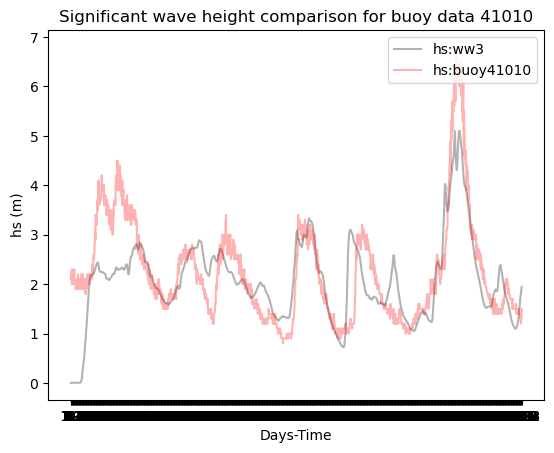

In [18]:

data_41010= pd.read_csv(pp_root_wave+'41010.txt', sep=r'[ \s]+')  # Or the appropriate delimiter
data_41010= pd.DataFrame(data_41010)
data_41010 = data_41010[data_41010['WVHT'] != 99.0]

days_41010 = data_41010.DD.astype(str).to_numpy()
hours_41010= data_41010.hh.astype(str).to_numpy()
t_41010 = [x +'-'+y for x, y in zip(days_41010, hours_41010)]


# Access the data using the header names
x_bouy_41010=-78.467
y_bouy_41010=28.878
x_index=np.abs(lon_x-x_bouy_41010).argmin()
y_index=np.abs(lat_y-y_bouy_41010).argmin()
m_41010=np.array(hs[:,y_index,x_index])
# plt.plot(t,m_41010,'r',alpha=0.3,label='ww3')
print(x_index,lon_x[x_index])
print(y_index,lat_y[y_index])


plt.plot(t_mh,m_41010,'k', alpha=0.3, label='hs:ww3')
plt.plot(t_41010,data_41010.WVHT,'r', alpha=0.3, label='hs:buoy41010')
plt.legend(loc='upper right'); plt.xlabel('Days-Time'); plt.ylabel('hs (m)'); plt.title('Significant wave height comparison for buoy data 41010');

/tmp/ipykernel_1510541/3562606054.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_buoN= pd.read_csv(pp_root_wave+filenumber+'.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


244 -78.48001
311 28.856512


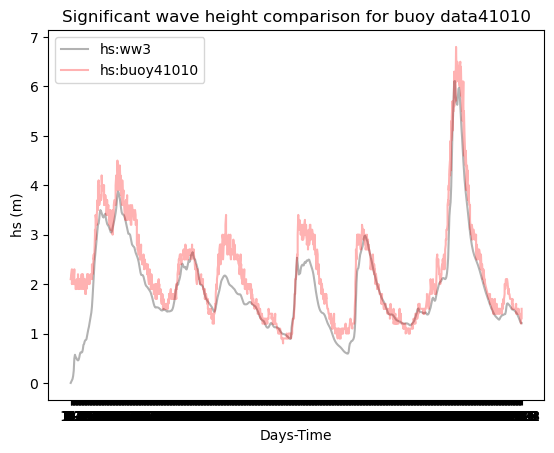

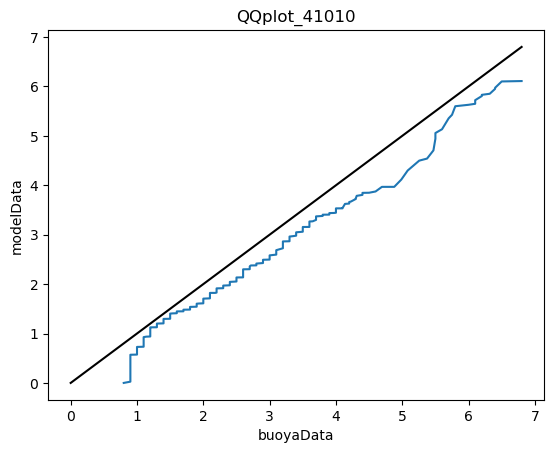

In [28]:
_,m_buoN,_,data_buoN_hs=hscompare_buo('41010',-78.467,28.878,lon_x,lat_y,hs,t_mh)

QQplot(data_buoN_hs,m_buoN,'buoyaData','modelData','QQplot_41010')

/tmp/ipykernel_1510541/3562606054.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_buoN= pd.read_csv(pp_root_wave+filenumber+'.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


54 -93.67999
272 26.088764


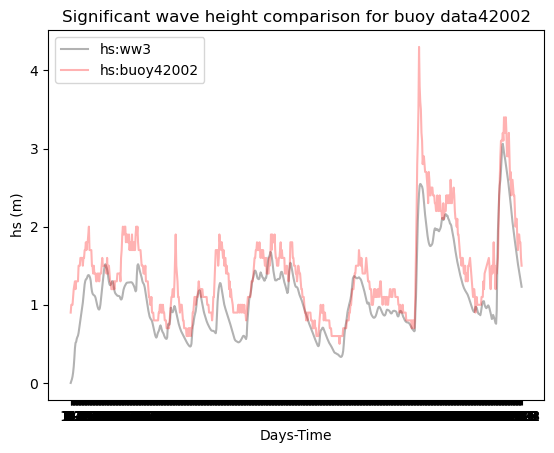

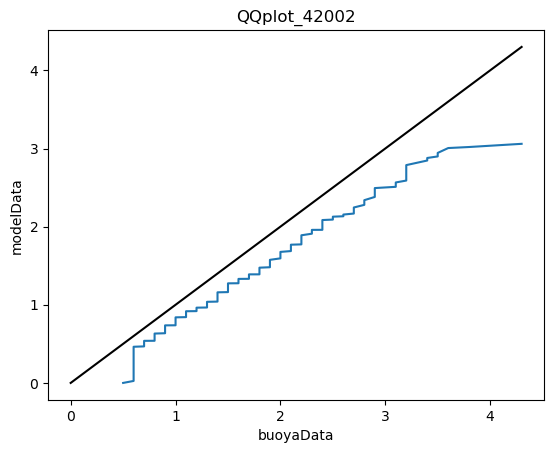

In [29]:
_,m_buoN,_,data_buoN_hs=hscompare_buo('42002',-93.646,26.055,lon_x,lat_y,hs,t_mh)


QQplot(data_buoN_hs,m_buoN,'buoyaData','modelData','QQplot_42002')

/tmp/ipykernel_1510541/3562606054.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_buoN= pd.read_csv(pp_root_wave+filenumber+'.txt', sep=r'[ \s]+')  # Or the appropriate delimiter


310 -73.20001
485 40.2817


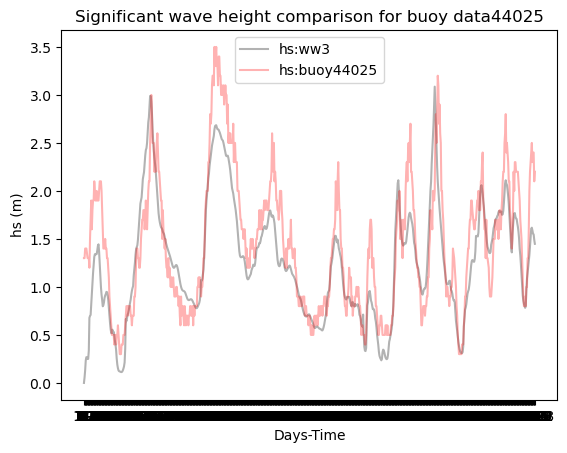

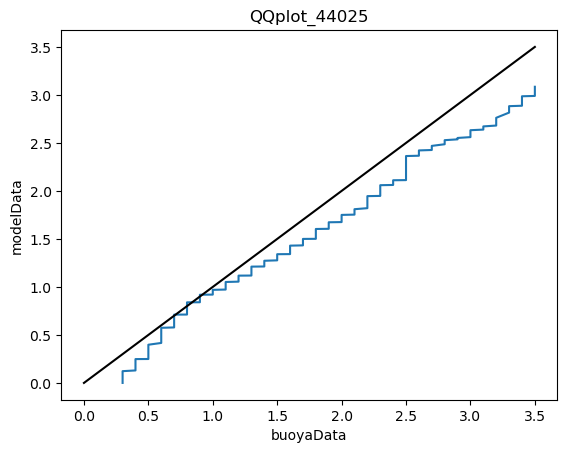

In [30]:
_,m_buoN,_,data_buoN_hs=hscompare_buo('44025',-73.175,40.258,lon_x,lat_y,hs,t_mh)

QQplot(data_buoN_hs,m_buoN,'buoyaData','modelData','QQplot_44025')

In [2]:
def read_and_write_file(input_file, output_file):
    """Reads a file and writes its contents to another file."""

    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        content = infile.read()  # Read the entire file as a string
        outfile.write(content)  # Write the string to the output file

if __name__ == "__main__":
    input_file = '/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wave/MOM_parameter_doc.all'
    output_file = 'output.txt'
    read_and_write_file(input_file, output_file)

In [3]:
import difflib
file1='/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wave/MOM_parameter_doc.all'
file2='new39.txt'
with open(file1) as f1, open(file2) as f2:
    diff = difflib.unified_diff(f1.readlines(), f2.readlines(), fromfile='file1.txt', tofile='file2.txt')

for line in diff:
    print(line)

--- file1.txt

+++ file2.txt

@@ -43,7 +43,7 @@

                                 ! If true, uses the old remapping-via-a-delta-z method for remapping u and v. If

                                 ! false, uses the new method that remaps between grids described by an old and

                                 ! new thickness.

-REMAP_AUXILIARY_VARS = True     !   [Boolean] default = False

+REMAP_AUXILIARY_VARS = False    !   [Boolean] default = False

                                 ! If true, apply ALE remapping to all of the auxiliary 3-dimensional variables

                                 ! that are needed to reproduce across restarts, similarly to what is already

                                 ! being done with the primary state variables.  The default should be changed to

@@ -53,11 +53,14 @@

                                 ! layers.  Layers 1 through NKML+NKBL have variable densities. There must be at

                                 ! least NKML+NKBL+1 layers if BULKMIX